In [ ]:
import pandas as pd
import matplotlib.ticker as ticker
from scipy.stats import levene
from scipy.stats import ttest_ind
from scipy.stats import norm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('q1final.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26768 entries, 0 to 26767
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   price_check_time   26768 non-null  object 
 1   passenger          26768 non-null  int64  
 2   origin             26768 non-null  int64  
 3   destination        26768 non-null  int64  
 4   price              26768 non-null  int64  
 5   subsidy            26768 non-null  int64  
 6   distance           26507 non-null  float64
 7   expected_duration  26498 non-null  float64
 8   req_time           16717 non-null  object 
 9   driver             14403 non-null  float64
 10  status             16717 non-null  float64
dtypes: float64(4), int64(5), object(2)
memory usage: 2.2+ MB


In [ ]:
#چک کردن داده های خالی
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)


                   Total Null Values  Percentage
price_check_time                   0         0.0
passenger                          0         0.0
origin                             0         0.0
destination                        0         0.0
price                              0         0.0
subsidy                            0         0.0
distance                         261         1.0
expected_duration                270         1.0
req_time                       10051        37.5
status                         10051        37.5
driver                         12365        46.2


قسمت اول-انجام پیش پردازشها

In [ ]:
#حذف داده های خالی
df.dropna(inplace=True)
nvc = pd.DataFrame(df.isnull().sum().sort_values(), columns=['Total Null Values'])
nvc['Percentage'] = round(nvc['Total Null Values']/df.shape[0],3)*100
print(nvc)

                   Total Null Values  Percentage
price_check_time                   0         0.0
passenger                          0         0.0
origin                             0         0.0
destination                        0         0.0
price                              0         0.0
subsidy                            0         0.0
distance                           0         0.0
expected_duration                  0         0.0
req_time                           0         0.0
driver                             0         0.0
status                             0         0.0


In [ ]:
modified_df = df.__deepcopy__()

In [ ]:
#حذف داده های تکراری
counter = 0
rs,cs = df.shape
modified_df.drop_duplicates(inplace=True)

if modified_df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {rs-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [ ]:
#انجام پیش پردازش روی زمانها و هزینه
modified_df['price_check_date'] = pd.to_datetime(modified_df.price_check_time).dt.date
modified_df['float_price_check_hour'] = pd.to_datetime(modified_df.price_check_time).dt.hour + pd.to_datetime(modified_df.price_check_time).dt.minute/60
modified_df['price_check_hour'] = pd.to_datetime(modified_df.price_check_time).dt.hour
modified_df['price_check_time'] = pd.to_datetime(modified_df.price_check_time).dt.time
modified_df['req_date'] = pd.to_datetime(modified_df.req_time).dt.date
modified_df['float_req_hour'] = pd.to_datetime(modified_df.req_time).dt.hour + pd.to_datetime(modified_df.req_time).dt.minute/60
modified_df['req_hour'] = pd.to_datetime(modified_df.req_time).dt.hour
modified_df['req_time'] = pd.to_datetime(modified_df.req_time).dt.time

modified_df['price_after_subsidy'] = modified_df['price'] - modified_df['subsidy']

modified_df = modified_df[['price_check_date','float_price_check_hour','price_check_hour','price_check_time','passenger','origin','destination','price','subsidy','price_after_subsidy','distance','expected_duration','req_date','float_req_hour','req_hour','req_time','driver','status']]


In [ ]:
df2 = modified_df.__deepcopy__()

In [ ]:
df2

,price_check_date,float_price_check_hour,price_check_hour,price_check_time,passenger,origin,destination,price,subsidy,price_after_subsidy,distance,expected_duration,req_date,float_req_hour,req_hour,req_time,driver,status
655,2021-01-02,17.300000,17,17:18:00,6747,0,0,65000,10000,55000,3608.0,7.0,2021-01-02,17.383333,17,17:23:00,1.0,1.0
656,2021-01-03,23.883333,23,23:53:00,0,0,0,55000,10000,45000,4155.0,8.0,2021-01-04,0.033333,0,00:02:00,2.0,1.0
657,2021-01-04,7.983333,7,07:59:00,1077,0,0,70000,10000,60000,6526.0,10.0,2021-01-04,8.016667,8,08:01:00,2.0,1.0
658,2021-01-01,10.666667,10,10:40:00,1177,0,0,55000,10000,45000,3535.0,6.0,2021-01-01,10.716667,10,10:43:00,2.0,2.0
659,2021-01-05,10.200000,10,10:12:00,1740,0,0,50000,10000,40000,3088.0,7.0,2021-01-05,10.216667,10,10:13:00,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26763,2021-01-07,10.316667,10,10:19:00,3547,4,4,35000,10000,25000,1258.0,2.0,2021-01-07,10.350000,10,10:21:00,1642.0,1.0
26764,2021-01-03,16.433333,16,16:26:00,4478,4,4,35000,0,35000,154.0,1.0,2021-01-03,16.566667,16,16:34:00,1649.0,1.0
26765,2021-01-06,17.483333,17,17:29:00,4333,4,4,45000,10000,35000,1088.0,3.0,2021-01-06,17.550000,17,17:33:00,1676.0,1.0
26766,2021-01-04,16.816667,16,16:49:00,4594,4,4,60000,15000,45000,2299.0,5.0,2021-01-04,16.833333,16,16:50:00,1685.0,1.0


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14123 entries, 655 to 26767
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   price_check_date        14123 non-null  object 
 1   float_price_check_hour  14123 non-null  float64
 2   price_check_hour        14123 non-null  int64  
 3   price_check_time        14123 non-null  object 
 4   passenger               14123 non-null  int64  
 5   origin                  14123 non-null  int64  
 6   destination             14123 non-null  int64  
 7   price                   14123 non-null  int64  
 8   subsidy                 14123 non-null  int64  
 9   price_after_subsidy     14123 non-null  int64  
 10  distance                14123 non-null  float64
 11  expected_duration       14123 non-null  float64
 12  req_date                14123 non-null  object 
 13  float_req_hour          14123 non-null  float64
 14  req_hour                14123 non-nu

قسمت دوم-ماتریس او دی تقاضای سفر

In [ ]:
OD1 = modified_df.pivot_table(values='destination', index=modified_df["origin"],  columns = modified_df["destination"], fill_value=0, aggfunc=len)

In [ ]:
OD1

destination,0,1,2,3,4
origin,,,,,
0,760,533,513,0,0
1,2239,1919,834,0,0
2,2134,1906,616,1,0
3,0,0,0,1823,358
4,0,0,0,297,190


قسمت سوم- ماتریس او دی سفرهای انجام شده

In [ ]:
modified_df1 = modified_df[modified_df.status == 1.0] #فقط حالت اول
OD2 = modified_df1.pivot_table(values='destination', index=modified_df1["origin"], columns = modified_df1["destination"],  fill_value=0, aggfunc=len)

In [ ]:
OD2

destination,0,1,2,3,4
origin,,,,,
0,676,450,452,0,0
1,2006,1720,744,0,0
2,1899,1701,545,1,0
3,0,0,0,1626,329
4,0,0,0,265,171


قسمت چهارم

In [ ]:
a = (OD1-OD2)*100
b = (OD1.sum()).sum()
d = ((a/b).sum()).sum()
dd = round(d,2)  # درصد کل سفرهایی که انجام نشده اند
print('the percentage of requested trips(not happened):', dd)
c = round((a/b),2)
cc = (c.max()).max() # درصد ماکسیمم سفرهایی که از یک مبدا به یک مقصد انجام نشده اند

the percentage of requested trips(not happened): 10.89


In [ ]:
for i in range (len(c)):
  for j in range (len(c)):
    if c.iloc[i][j]==cc:
      print('maximum unhappend trips are from origin',i,'to destination',j)

maximum unhappend trips are from origin 2 to destination 0


قسمت پنجم

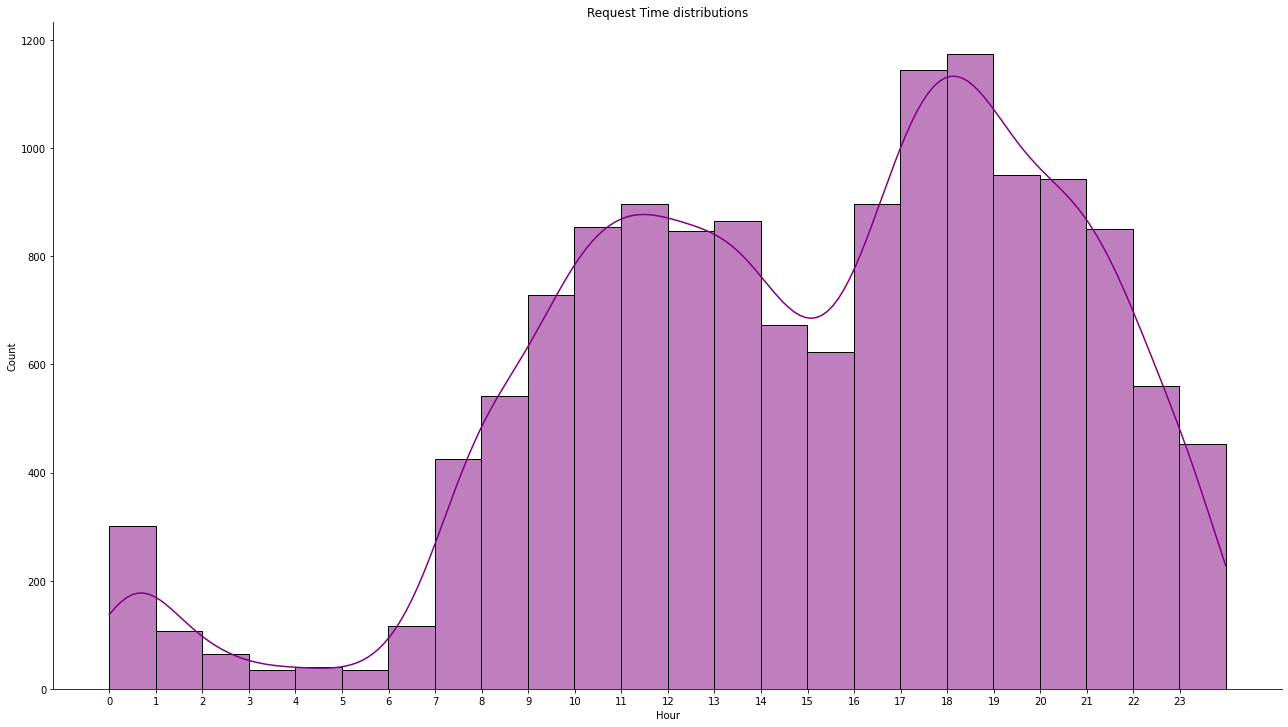

In [ ]:
sns.displot(data=modified_df, x="float_req_hour", kde=True, rug = False, height = 10,aspect = 1.8,bins=24,color = 'purple')
plt.xticks( np.arange(24),labels=np.arange(24))
plt.title("Request Time distributions")
plt.xlabel('Hour')
plt.show()

قسمت ششم-آزمون تی جهت بررسی برابری یا عدم برابری میانگینها

In [ ]:
t_test1 = ttest_ind(modified_df[modified_df['status']==2].price, modified_df[modified_df['status']!=2].price, equal_var=True)
print('The p-value is:', t_test1.pvalue)


The p-value is: 0.10786565336055738


In [ ]:
قسمت هفتم-آزمون تی جهت بررسی برابری یا عدم برابری میانگینها

In [ ]:
t_test2 = ttest_ind(modified_df[modified_df['status']==3].price, modified_df[modified_df['status']!=3].price, equal_var=True)
print('The p-value is:', t_test2.pvalue)


The p-value is: 0.6664686796151782


قسمت هشتم

In [ ]:
peak_index = ((modified_df.float_req_hour<=8)&(modified_df.float_req_hour>=6)|(modified_df.float_req_hour<=19)&(modified_df.float_req_hour>=16))
n_A = len(modified_df[peak_index])
n_B = len(modified_df[~peak_index])
p_A = len(modified_df[peak_index][modified_df.status == 3])/len(modified_df[peak_index])
p_B = len(modified_df[~peak_index][modified_df.status == 3])/len(modified_df[~peak_index])
p_tot = len(modified_df[modified_df.status == 3])/len(modified_df)
SE_p = (p_tot*(1-p_tot)*(1/n_A + 1/n_B))**0.5
print(f"p_A =\t%.4f\np_B =\t%.4f\np_tot =\t%.4f\nSE_p:\t%.4f" %(p_A,p_B,p_tot,SE_p))

p_A =	0.0502
p_B =	0.0501
p_tot =	0.0501
SE_p:	0.0041


In [ ]:
Z = (p_A - p_B)/SE_p
pvalue_peak= norm.sf(Z, loc=0, scale=1)*2
print('The p-value is:', pvalue_peak)
print('Z:', Z)

The p-value is: 0.9788606156439819
Z: 0.026497389628706992


قسمت نهم

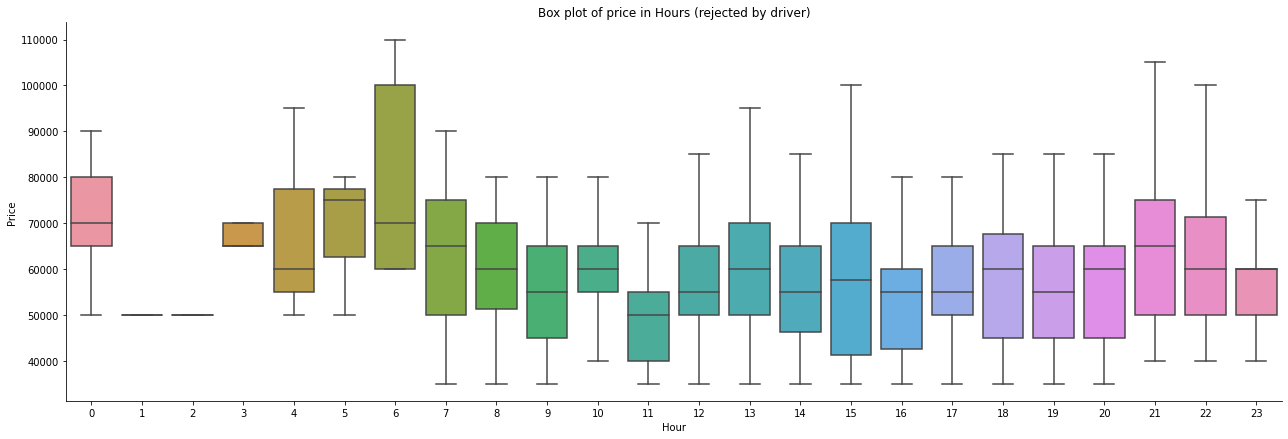

In [ ]:
sns.catplot(x="req_hour", y="price", kind="box", data=modified_df[modified_df.status == 3],showfliers=False, height=6, aspect=3)
plt.ylabel('Price')
plt.xlabel('Hour')
plt.title('Box plot of price in Hours (rejected by driver)')
plt.show()